# Lab 6: Implementing Support Vector Machine (SVM)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


## Importing the dataset

In [2]:
iris = datasets.load_iris()
print(iris)
# We'll use the petal length and width only for this analysis
X = iris.data[:, [2, 3]]
y = iris.target

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

##Exploratory Data Analysis
##Place the iris data into a pandas dataframe

In [3]:
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

# View the first 5 rows of the data
print(iris_df.head())

# Print the unique labels of the dataset
print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

The unique labels in this data are [0 1 2]


## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


#Plot the original Data

<ipython-input-6-8292f75f82a3>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


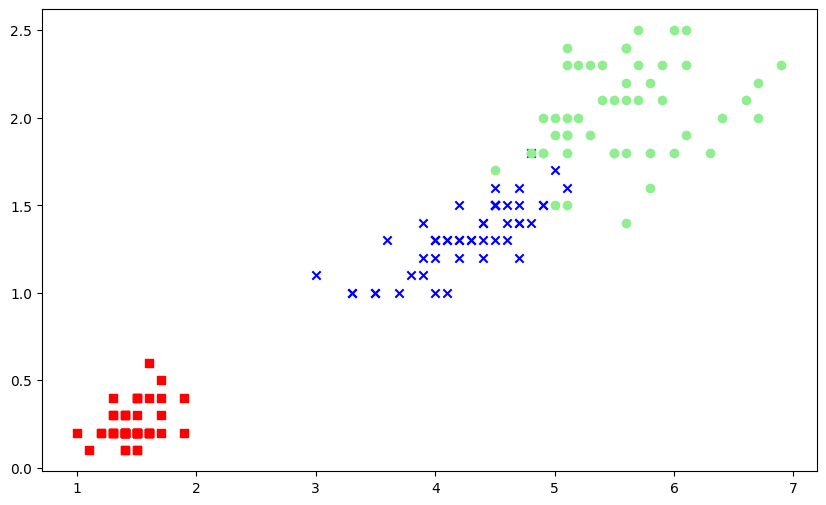

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[:len(np.unique(y_test))])
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               c=cmap(idx), marker=markers[idx], label=cl)

###If we plot the original data, we can see that one of the classes is linearly separable, but the other two are not.

## Training the SVM model on the Training set

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(gamma=0.1, random_state=0)

### No. of Support Vectors for Each Class

In [8]:
# Get the number of support vectors for each class
support_vectors_per_class = svm.n_support_
# Print the number of support vectors for each class
for class_index, support_vectors in enumerate(support_vectors_per_class):
 print("Class", class_index, "Support Vectors:", support_vectors)


Class 0 Support Vectors: 6
Class 1 Support Vectors: 23
Class 2 Support Vectors: 17


### Precision and F1 score

In [9]:
# Make predictions on the training set
y_pred1 = svm.predict(X_train_std)

In [10]:
from sklearn.metrics import precision_score, f1_score
# Calculate the precision
precision = precision_score(y_train, y_pred1, average='macro')
print("Precision:", precision)
# Calculate the precision
f1 = f1_score(y_train, y_pred1, average='macro')
print("F1_Score:", f1)

Precision: 0.9521531100478469
F1_Score: 0.9527139527139526


## Finding Accuracy of model on Test and Train Set

In [11]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


## Predicting a Case

Pedal width = 1.2

Pedal Length = 2.0


Feature Scaling fot Prediction

In [12]:
val = [[1.2,2.0]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(val)

val_std = sc.transform(val)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(val_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0                0.0               0.0


In [14]:
# Make prediction
print(svm.predict(val_std))

[1]


## Create the function for Visualizing Testing and Training model

In [15]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
plt.show()

## Visualising the Train set results

<ipython-input-15-8b7fade539d9>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


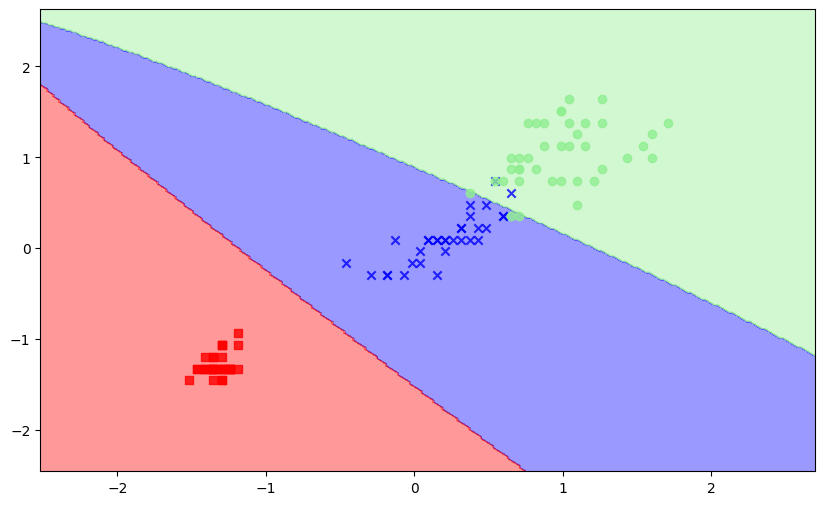

In [16]:
plot_decision_regions(X_train_std, y_train, svm)

## Visualising the Test set results

<ipython-input-15-8b7fade539d9>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


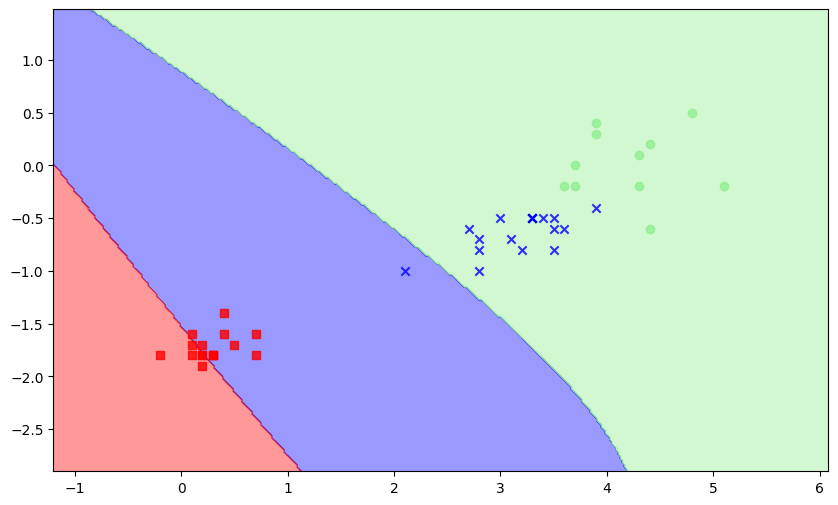

In [17]:
plot_decision_regions(X_test_std, y_test, svm)

# New Model

In [18]:
from sklearn.svm import SVC
svm2 = SVC(kernel='poly', random_state=33, degree=5, coef0=0.3, gamma=.10, C=1.0)
svm2.fit(X_train_std, y_train)

SVC(coef0=0.3, degree=5, gamma=0.1, kernel='poly', random_state=33)

### No. of Support Vectors for Each Class

In [19]:
# Get the number of support vectors for each class
support_vectors_per_class = svm2.n_support_
# Print the number of support vectors for each class
for class_index, support_vectors in enumerate(support_vectors_per_class):
 print("Class", class_index, "Support Vectors:", support_vectors)


Class 0 Support Vectors: 20
Class 1 Support Vectors: 32
Class 2 Support Vectors: 32


### Precision and F1 score

In [20]:
# Make predictions on the training set
y_pred1 = svm2.predict(X_train_std)

In [21]:
from sklearn.metrics import precision_score, f1_score
# Calculate the precision
precision = precision_score(y_train, y_pred1, average='macro')
print("Precision:", precision)
# Calculate the precision
f1 = f1_score(y_train, y_pred1, average='macro')
print("F1_Score:", f1)

Precision: 0.954954954954955
F1_Score: 0.9530143603997089


### Accuracy of New Model

In [22]:
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm2.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm2.score(X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.27 out of 1


## Predicting a Case

Pedal width = 1.2

Pedal Length = 2.0


Feature Scaling fot Prediction

In [23]:
val1 = [[1.2,2.0]]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(val)

val1_std = sc.transform(val1)
X_test_std = sc.transform(X_test)

print('After standardizing our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(val1_std, columns=iris_df.columns).head())

After standardizing our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0                0.0               0.0


In [24]:
# Make prediction
print(svm2.predict(val1_std))

[1]
